# Introduction

### Problem Description:

##### Metropolitan Council of Nashville and Davidson County has two questions regarding interactions between Nashville citizens and the police. 

##### Part 1: 
Metro council wants to better understand the relationship between adverse events and levels of dissatisfaction with police.  They want to know if citizens are more dissatisfied with the police in areas where police calls are more frequent. 

##### Part 2: 
Metro council wants to know if there are certain days of the week where traffic violations are more likely to end in a warning as opposed to a citation. 

---

### Data

#####  There are two data sets used in this analysis:

The `police_calls` data set contains metro Nashville police department calls for service in 2018.  It can be found here: https://www.opendatanetwork.com/dataset/data.nashville.gov/kwnd-qrrm

The `metro_survey` data base contains survey results with information about satisfaction levels of Nashville residents on a variety of topics.  It can be found here: https://data.nashville.gov/General-Government/Metro-Resident-Survey-Responses/nux7-cwab

---

# Table of contents
1. [Part 1](#one)

    1.1 [Loading packages and data](#pandd)
    
    1.2 [Data Cleaning](#cleaning)
    
    1.3 [Data Exploration](#explore)
    
    1.4 [Analysis](#analysis)
    
    1.5 [Conclusions](#con)
    
---

2. [Part 2](#two)
    
    2.1 [Data Cleaning](#cleaning2)
    
    2.2 [Data Exploration](#explore2)
    
    2.3 [Analysis](#analysis2)
    
    2.4 [Conclusions](#con2)

---

<a name="one"></a>

# Part One

<a name="pandd"></a>

## Loading packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium
import seaborn as sb

%matplotlib inline

---

Import police cals data and view the first five rows

In [2]:
police_calls = pd.read_csv(r"D:\NSS\JumpStart\NSS_Analytics_Jumpstart-01\data\police_calls_2018.csv")

police_calls.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


---

<a name="cleaning"></a>

## Data Cleaning

---

Keep only specified columns

In [3]:
police_calls = police_calls[['Call Received',
            'Shift',
            'Tencode',
            'Tencode Description',
            'Disposition Code',
            'Disposition Description',
            'Unit Dispatched',
            'Sector',
            'Zone',
            'Latitude',
            'Longitude',
            'zipcode',
            'PO']]

police_calls.head()

,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


---

Rename columns

In [4]:
police_calls.rename(columns = {'Call Received' : 'call_time',
            'Shift' : 'shift',
            'Tencode' : 'tencode',
            'Tencode Description' : 'tencode_desc',
            'Disposition Code' : 'disposition',
            'Disposition Description' : 'disposition_desc',
            'Unit Dispatched' : 'unit_dispatched',
            'Sector' : 'sector',
            'Zone' : 'zone',
            'Latitude' : 'lat',
            'Longitude' : 'lng',
            'zipcode' : 'zipcode',
            'PO' : 'po'}, inplace = True)

police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


---

Unique disposition descriptions

In [5]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

---

Unique tencode descriptions

In [6]:
police_calls['tencode_desc'].unique()

array(['Traffic Violation', 'Administrative/Special Assignment',
       'Safety Hazard', 'Want Officer for Investigation / Assistance',
       'Community Policing Activity', 'Vehicle Blocking Right of Way',
       'Mentally ILL Person', 'Burglary - Residence', 'Fight / Assault',
       'Vehicle Accident - Property Damage', 'Business Check',
       'Burglary - Non-Residence', 'Disorderly Person', 'Theft',
       'Shots Fired', 'Suspicious Person',
       'Vehicle Accident - Personal Injury',
       'Investigate 911 Hang-Up Call', 'Suicidal Person',
       'Transport Prisoner / Suspect', 'Personal Relief',
       'Missing Person', 'Dangerous / Injured Animal', 'Fixed Post',
       'Intoxicated Person', 'Meal Break', 'Corpse / D. O. A.', 'Prowler',
       'Holdup / Robbery', 'Person with Weapon',
       'Hazardous Liquid / Gas Leak', 'Occult Activity', 'Gang Activity',
       'Shooting', 'Kidnapping', 'Person Screaming',
       'Person Indecently Exposed', 'Fire', 'Explosion', 'Bank Robbe

---

Remove all rows where the disposition description is missing

In [7]:
police_calls = police_calls.dropna(subset='disposition_desc')

police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


---

Remove any rows where the disposition description is DISREGARD /
SIGNAL 9

In [8]:
police_calls = police_calls[police_calls['disposition_desc'] != 'DISREGARD / SIGNAL 9']

police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


---

<a name="explore"></a>

## Data Exploration 

---

I create a dataframe with a count of each tencode description

In [9]:
#Count how many calls per tencode descriptions
tencode_counts = police_calls['tencode_desc'].value_counts()

#Reset the index to turn it into a df
tencode_counts = tencode_counts.reset_index()

#Rename the columns
tencode_counts.columns = ['tencode', 'tencode_count']

#view the head
tencode_counts.head()

,tencode,tencode_count
0,Business Check,154797
1,Traffic Violation,141363
2,Want Officer for Investigation / Assistance,104495
3,Administrative/Special Assignment,35161
4,Community Policing Activity,34011


---

I visualize the frequency of calls by tencode description

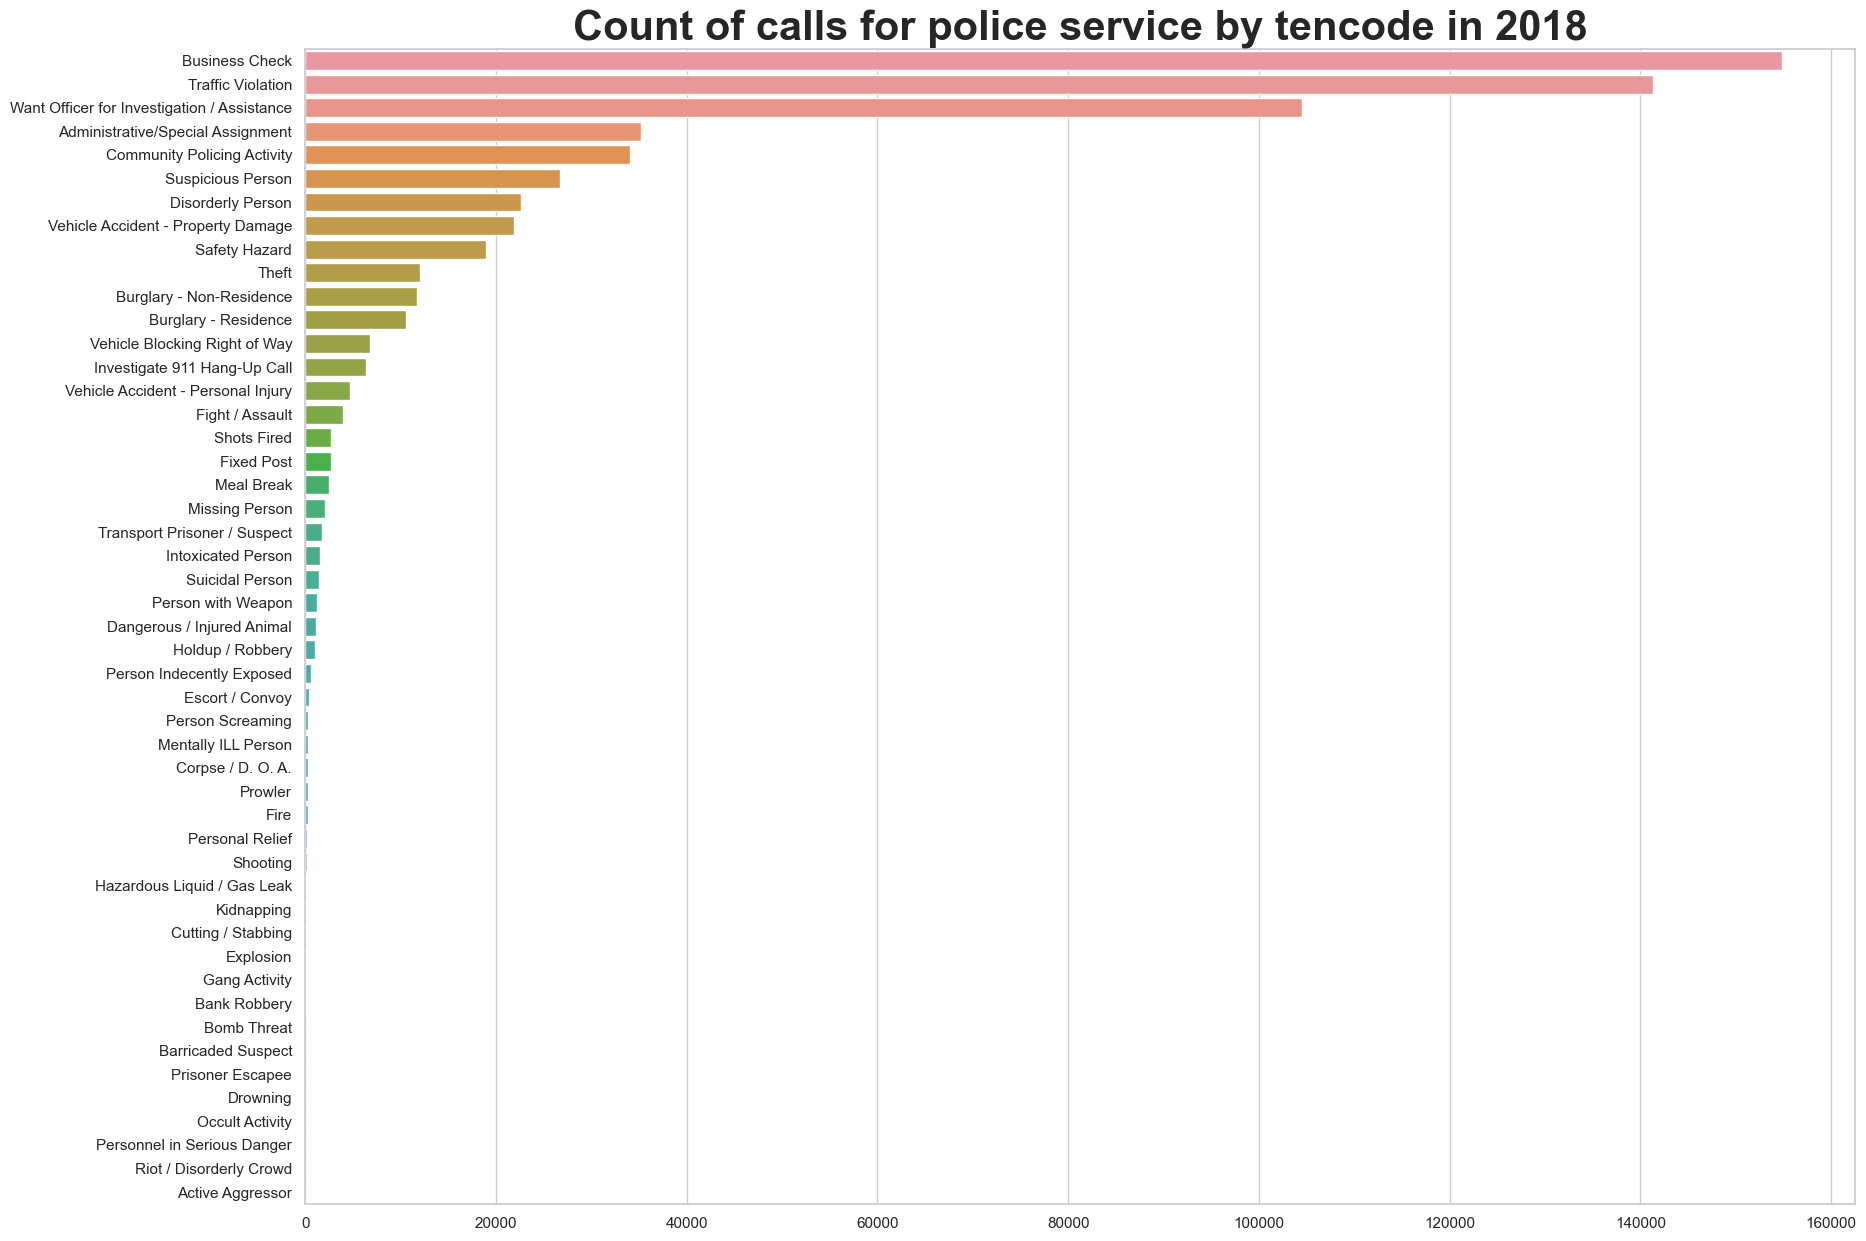

In [10]:
#set a figure size
plt.figure(figsize = (20, 15))

#set a style
sns.set(style="whitegrid")

#create a horizontal barplot
sns.barplot(x="tencode_count", y="tencode", data = tencode_counts)

#set a title
plt.title('Count of calls for police service by tencode in 2018', size = 30, fontweight = 'bold')

#remove the x and y labels
plt.xlabel('')
plt.ylabel('');

---

It looks like there are a few tencode descriptions that are very common while some are very uncommon.  Its impossible to see the count of tencode descriptions towards the bottom of the graph.  

To fix this, I will create another graph with the x-axis on a log scale

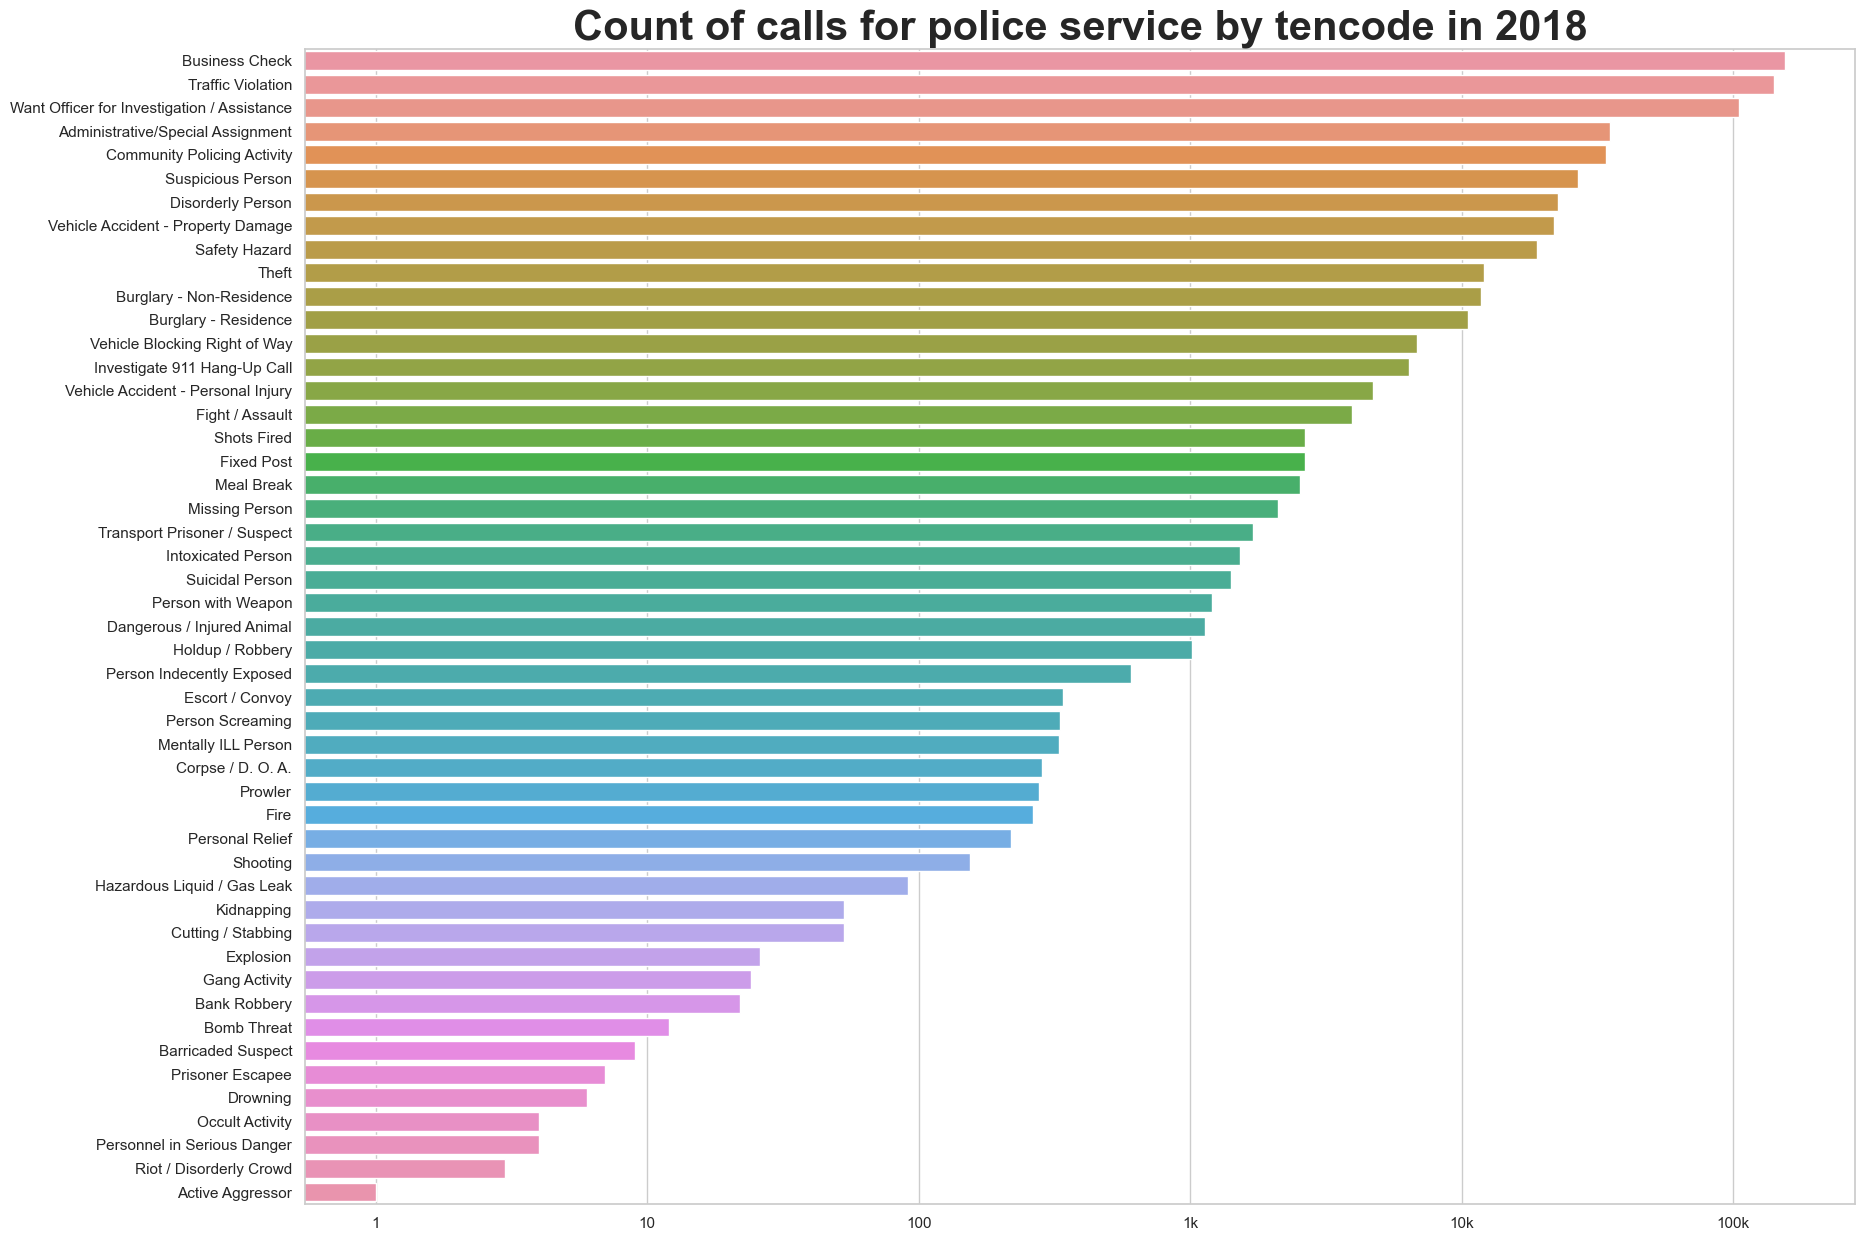

In [11]:
#set a figure size
plt.figure(figsize = (20, 15))

#set a style
sns.set(style="whitegrid")

#create a horizontal barplot
sns.barplot(x="tencode_count", y="tencode", data = tencode_counts)

#set a title
plt.title('Count of calls for police service by tencode in 2018', size = 30, fontweight = 'bold')

#remove the x and y labels
plt.xlabel('')
plt.ylabel('')

#put the x-axis on a log scale
plt.xscale('log')

#specify the intervals and labels for the x-axis
plt.xticks(ticks = [1, 10, 100, 1000, 10000, 100000], labels = ['1', '10', '100', '1k', '10k', '100k']);

---

<a name="analysis"></a>

## Analysis

---

I create dataframe containing the names and counts for the most frequent tencode descriptions

In [12]:
# value counts for the tencode_desc column of the police_calls df
tencode_desc_counts = police_calls['tencode_desc'].value_counts().reset_index()

# rename columns
tencode_desc_counts.columns = ['tencode_desc', 'count']

# narrow the df down to only the tencode_desc that have counts higher than 1,000
tencode_desc_counts = tencode_desc_counts[tencode_desc_counts['count'] > 1000]

tencode_desc_counts.head()

,tencode_desc,count
0,Business Check,154797
1,Traffic Violation,141363
2,Want Officer for Investigation / Assistance,104495
3,Administrative/Special Assignment,35161
4,Community Policing Activity,34011


---

A data frame containing counts of police calls by zipcode

In [13]:
zipcodes_df = police_calls['zipcode'].value_counts().reset_index()\
              .rename(columns = {'index' : 'zip', 'zipcode' : 'count'})

zipcodes_df.head()

,zip,count
0,37203,62767
1,37209,52860
2,37207,50101
3,37211,48528
4,37115,40937


---

I create a for loop that takes each tencode description and returns a count for that tencode description by zipcode.  

I then merge all counts into one dataframe

In [14]:
#Obtain the zipcode for each tencode description
#Count the number of calls for a given tencode for each zipcode and rename the columns
#Merge each new data frame onto the existing zipcodes_df 

for i in tencode_desc_counts['tencode_desc']:
    zipcodes_df = police_calls.loc[police_calls['tencode_desc'] == i]['zipcode']\
          .value_counts().reset_index().rename(columns = {'index' : 'zip', 'zipcode' : i})\
          .merge(zipcodes_df, how = 'outer', on = 'zip')

---

Each column is a count of the frequency of a given tencode description for the corresponding zip code

In [15]:
zipcodes_df

,zip,Holdup / Robbery,Dangerous / Injured Animal,Person with Weapon,Suicidal Person,Intoxicated Person,Transport Prisoner / Suspect,Missing Person,Meal Break,Fixed Post,...,Safety Hazard,Vehicle Accident - Property Damage,Disorderly Person,Suspicious Person,Community Policing Activity,Administrative/Special Assignment,Want Officer for Investigation / Assistance,Traffic Violation,Business Check,count
0,37211,116.0,95.0,102.0,139.0,89.0,241.0,192.0,100.0,185.0,...,1540.0,2215.0,1764.0,2103.0,1629.0,1281.0,9753,12393.0,9291.0,48528
1,37203,89.0,40.0,89.0,161.0,264.0,308.0,128.0,281.0,326.0,...,1131.0,2132.0,2797.0,2965.0,3921.0,4163.0,9601,11954.0,17580.0,62767
2,37115,86.0,73.0,102.0,99.0,53.0,97.0,128.0,122.0,129.0,...,1122.0,1208.0,1727.0,1711.0,964.0,1437.0,7230,9091.0,11866.0,40937
3,37207,84.0,83.0,121.0,97.0,67.0,133.0,220.0,87.0,163.0,...,1623.0,1492.0,1754.0,2254.0,1484.0,3195.0,9270,12865.0,10587.0,50101
4,37013,68.0,122.0,84.0,137.0,55.0,40.0,226.0,7.0,111.0,...,1419.0,1797.0,1274.0,1436.0,1097.0,332.0,6648,5677.0,3086.0,28677
5,37217,59.0,56.0,49.0,45.0,44.0,11.0,116.0,94.0,182.0,...,887.0,1047.0,1041.0,1023.0,494.0,4341.0,5325,8771.0,3796.0,29831
6,37214,59.0,64.0,51.0,63.0,54.0,28.0,80.0,288.0,188.0,...,1566.0,925.0,932.0,949.0,1085.0,1699.0,4729,7879.0,6043.0,29263
7,37209,58.0,81.0,49.0,61.0,34.0,53.0,105.0,227.0,60.0,...,1073.0,1106.0,1192.0,1531.0,6458.0,1742.0,5141,12644.0,17707.0,52860
8,37076,50.0,76.0,56.0,67.0,23.0,266.0,109.0,285.0,84.0,...,811.0,803.0,724.0,828.0,589.0,1310.0,4637,6121.0,4807.0,23888
9,37210,48.0,20.0,92.0,56.0,56.0,15.0,91.0,82.0,42.0,...,1436.0,1775.0,1506.0,2472.0,1502.0,2395.0,5913,7863.0,7001.0,35911


---

### SQL - Pulling survey data from database

I will create a connection to the `metro_survey.db` data base which contains survey results with information about the satisfaction levels of Nashville residents.

Below is an entity relationship diagram for this database: 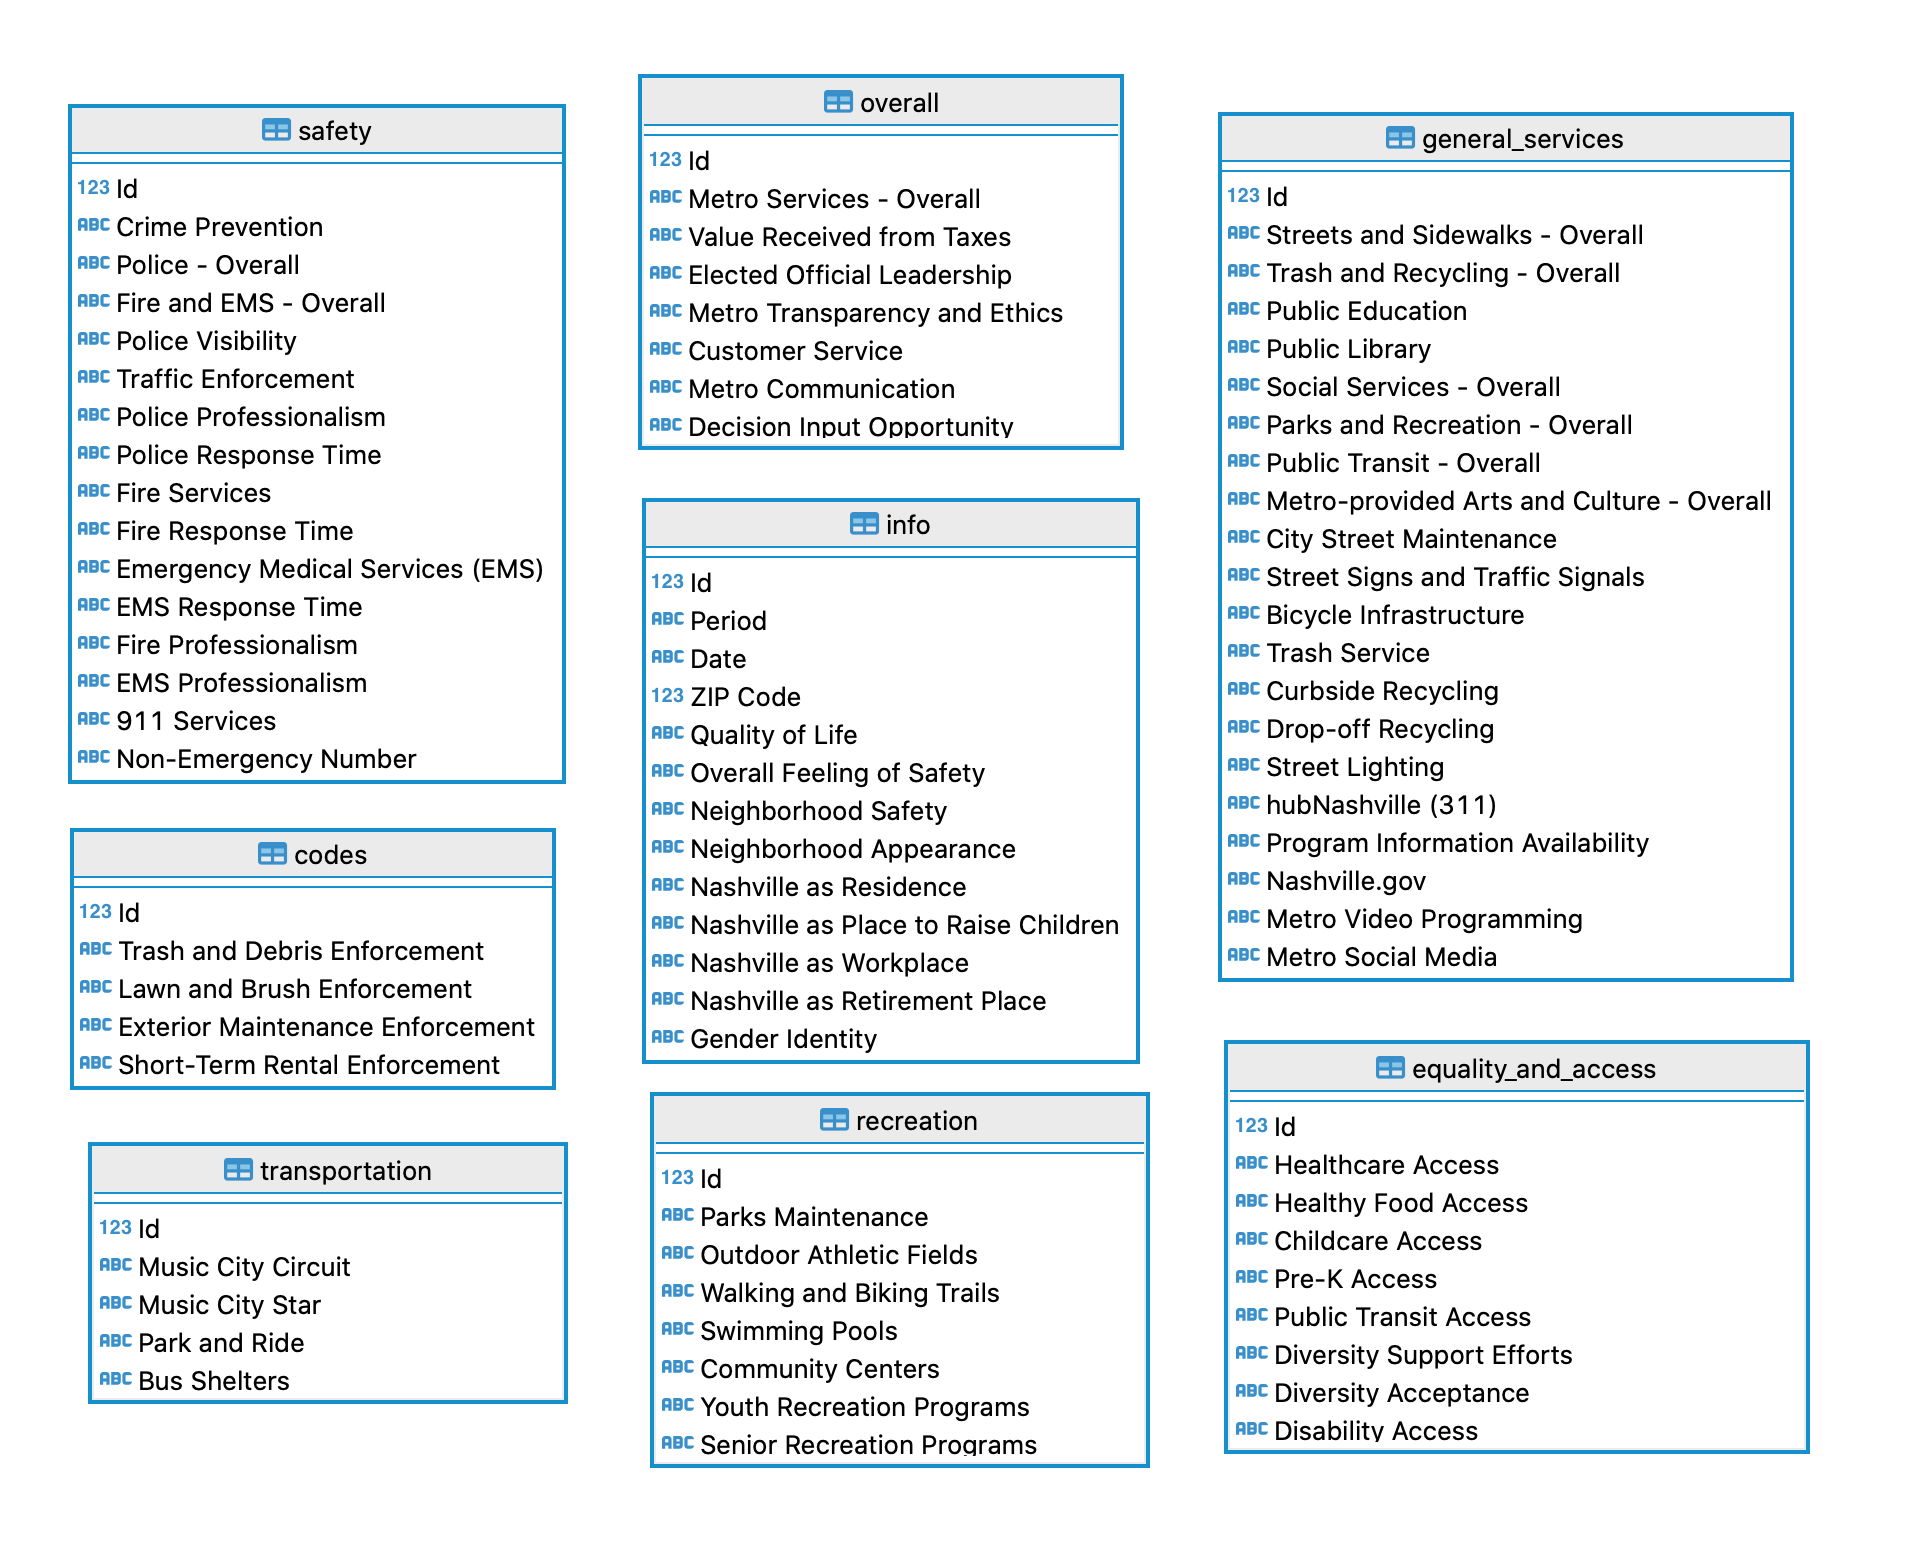

In [16]:
#Tell python what database to connect to
conn = sql.connect(r"D:\NSS\JumpStart\NSS_Analytics_Jumpstart-01\data\metro_survey.db")

---

I query the data and save it to a pandas dataframe.

In [17]:
#I want information about police from the safety table and zipcode data from the info table
query = '''
SELECT "ZIP code", "Police - Overall"
FROM safety s
    INNER JOIN info i
        ON s.Id = i.Id
'''

#The read_sql function converts the query into a pandas dataframe
safety_exp = pd.read_sql(query, conn)

#View the first five rows
safety_exp.head()

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
1,37211,Satisfied
2,37208,Neutral
3,37203,Very Satisfied
4,37138,Neutral


---

I view the possible responses for the police satisfaction survey

In [18]:
safety_exp['Police - Overall'].unique()

array(['Very Dissatisfied', 'Satisfied', 'Neutral', 'Very Satisfied',
       'Dissatisfied', "Don't Know"], dtype=object)

---

I create a new DataFrame, `safety_total` which contains the total number of responses
per zip code. 

In [19]:
#Count the number of responses per zipcode
safety_total = safety_exp['ZIP Code'].value_counts().reset_index()

#Rename the columns
safety_total.columns = ['zipcode', 'total_responses']

#View the head
safety_total.head()

,zipcode,total_responses
0,37207,226
1,37211,190
2,37013,180
3,37221,141
4,37208,121


---

I want to obtain a dataframe that counts the number of people per zipcode who are dissatisfied with the police

In [20]:
#Filter for rows where 'Police - Overall' is either “Dissatisfied” or “Very Dissatisfied”
#Count the number of rows per zipcode
safety_dissatisfied = safety_exp[safety_exp['Police - Overall'].isin(['Dissatisfied', 'Very Dissatisfied'])]\
                      ['ZIP Code'].value_counts().reset_index()                

#Rename the columns
safety_dissatisfied.columns = ['zipcode', 'total_dissatisfied']

#View the head
safety_dissatisfied.head()

,zipcode,total_dissatisfied
0,37207,48
1,37013,36
2,37211,26
3,37208,22
4,37218,22


---

I want to obtain a dataframe that counts the number of people per zipcode who are satisfied with the police

In [21]:
#Filter for rows where 'Police - Overall' is either “Satisfied” or “Very satisfied”
#Count the number of rows per zipcode
safety_satisfied = safety_exp[safety_exp['Police - Overall'].isin(['Satisfied', 'Very Satisfied'])]\
                      ['ZIP Code'].value_counts().reset_index()                

#Rename the columns
safety_satisfied.columns = ['zipcode', 'total_satisfied']

#View the head
safety_satisfied.head()

,zipcode,total_satisfied
0,37211,119
1,37207,115
2,37013,100
3,37221,93
4,37209,81


---

I want to merge the `safety_dissatisfied` dataframe with the dateframe that contains the count of total responses

In [22]:
#Merge using an outer join
safety_by_zip = pd.merge(safety_dissatisfied, safety_total, on = 'zipcode', how = 'outer')

safety_by_zip.head()

,zipcode,total_dissatisfied,total_responses
0,37207,48.0,226
1,37013,36.0,180
2,37211,26.0,190
3,37208,22.0,121
4,37218,22.0,91


---

I want to merge `safety_satisfied` data frame onto the previous dataframe

In [23]:
#Merge using an outer join
safety_by_zip = pd.merge(safety_by_zip, safety_satisfied, on = 'zipcode', how = 'outer')

safety_by_zip

,zipcode,total_dissatisfied,total_responses,total_satisfied
0,37207,48.0,226,115.0
1,37013,36.0,180,100.0
2,37211,26.0,190,119.0
3,37208,22.0,121,59.0
4,37218,22.0,91,43.0
5,37206,19.0,107,60.0
6,37115,18.0,88,48.0
7,37209,17.0,115,81.0
8,37216,16.0,68,35.0
9,37217,14.0,50,26.0


---

If a value is na, this means there were zero people in that category.  Therefore, I fill the na values with zeros

In [24]:
safety_by_zip.fillna(0, inplace = True)

safety_by_zip

,zipcode,total_dissatisfied,total_responses,total_satisfied
0,37207,48.0,226,115.0
1,37013,36.0,180,100.0
2,37211,26.0,190,119.0
3,37208,22.0,121,59.0
4,37218,22.0,91,43.0
5,37206,19.0,107,60.0
6,37115,18.0,88,48.0
7,37209,17.0,115,81.0
8,37216,16.0,68,35.0
9,37217,14.0,50,26.0


---

I create a percent satisfied and percent dissatisfied column

In [25]:
#Divide the amount of people who are dissatisfied by the total responses and round to two decimal places
safety_by_zip['pct_dissatisfied'] = round(safety_by_zip['total_dissatisfied']/safety_by_zip['total_responses'] * 100, 2)

#Divide the amount of people who are satisfied by the total responses and round to two decimal places
safety_by_zip['pct_satisfied'] = round(safety_by_zip['total_satisfied']/safety_by_zip['total_responses'] * 100, 2)

#View the head
safety_by_zip.head()

,zipcode,total_dissatisfied,total_responses,total_satisfied,pct_dissatisfied,pct_satisfied
0,37207,48.0,226,115.0,21.24,50.88
1,37013,36.0,180,100.0,20.00,55.56
2,37211,26.0,190,119.0,13.68,62.63
3,37208,22.0,121,59.0,18.18,48.76
4,37218,22.0,91,43.0,24.18,47.25


---

I merge this dataframe (`safety_by_zip`) with the dataframe that contains the count of tencode descriptions by zipcode (`zipcodes_df`)

In [26]:
large_data = pd.merge(safety_by_zip, zipcodes_df, left_on = 'zipcode', right_on = 'zip', how = 'inner')

large_data

,zipcode,total_dissatisfied,total_responses,total_satisfied,pct_dissatisfied,pct_satisfied,zip,Holdup / Robbery,Dangerous / Injured Animal,Person with Weapon,...,Safety Hazard,Vehicle Accident - Property Damage,Disorderly Person,Suspicious Person,Community Policing Activity,Administrative/Special Assignment,Want Officer for Investigation / Assistance,Traffic Violation,Business Check,count
0,37207,48.0,226,115.0,21.24,50.88,37207,84.0,83.0,121.0,...,1623.0,1492.0,1754.0,2254.0,1484.0,3195.0,9270,12865.0,10587.0,50101
1,37013,36.0,180,100.0,20.00,55.56,37013,68.0,122.0,84.0,...,1419.0,1797.0,1274.0,1436.0,1097.0,332.0,6648,5677.0,3086.0,28677
2,37211,26.0,190,119.0,13.68,62.63,37211,116.0,95.0,102.0,...,1540.0,2215.0,1764.0,2103.0,1629.0,1281.0,9753,12393.0,9291.0,48528
3,37208,22.0,121,59.0,18.18,48.76,37208,43.0,59.0,100.0,...,666.0,797.0,1589.0,1872.0,1721.0,912.0,6540,6417.0,8898.0,33612
4,37218,22.0,91,43.0,24.18,47.25,37218,17.0,38.0,32.0,...,371.0,265.0,429.0,393.0,410.0,1772.0,2263,2054.0,3113.0,12697
5,37206,19.0,107,60.0,17.76,56.07,37206,39.0,41.0,70.0,...,592.0,755.0,1164.0,1923.0,1895.0,368.0,5710,12365.0,5745.0,34397
6,37115,18.0,88,48.0,20.45,54.55,37115,86.0,73.0,102.0,...,1122.0,1208.0,1727.0,1711.0,964.0,1437.0,7230,9091.0,11866.0,40937
7,37209,17.0,115,81.0,14.78,70.43,37209,58.0,81.0,49.0,...,1073.0,1106.0,1192.0,1531.0,6458.0,1742.0,5141,12644.0,17707.0,52860
8,37216,16.0,68,35.0,23.53,51.47,37216,28.0,24.0,24.0,...,389.0,325.0,510.0,610.0,1110.0,117.0,2614,4271.0,3595.0,15321
9,37217,14.0,50,26.0,28.00,52.00,37217,59.0,56.0,49.0,...,887.0,1047.0,1041.0,1023.0,494.0,4341.0,5325,8771.0,3796.0,29831


---

Some zipcodes only have a few survey responses.  It it unlikely that the responses of a few people in the zipcode are representitive of the entire zipcode.  Therefore I will drop all columns that have a total response rate of less than five

In [27]:
large_data = large_data[large_data['total_responses'] > 4]

large_data

,zipcode,total_dissatisfied,total_responses,total_satisfied,pct_dissatisfied,pct_satisfied,zip,Holdup / Robbery,Dangerous / Injured Animal,Person with Weapon,...,Safety Hazard,Vehicle Accident - Property Damage,Disorderly Person,Suspicious Person,Community Policing Activity,Administrative/Special Assignment,Want Officer for Investigation / Assistance,Traffic Violation,Business Check,count
0,37207,48.0,226,115.0,21.24,50.88,37207,84.0,83.0,121.0,...,1623.0,1492.0,1754.0,2254.0,1484.0,3195.0,9270,12865.0,10587.0,50101
1,37013,36.0,180,100.0,20.00,55.56,37013,68.0,122.0,84.0,...,1419.0,1797.0,1274.0,1436.0,1097.0,332.0,6648,5677.0,3086.0,28677
2,37211,26.0,190,119.0,13.68,62.63,37211,116.0,95.0,102.0,...,1540.0,2215.0,1764.0,2103.0,1629.0,1281.0,9753,12393.0,9291.0,48528
3,37208,22.0,121,59.0,18.18,48.76,37208,43.0,59.0,100.0,...,666.0,797.0,1589.0,1872.0,1721.0,912.0,6540,6417.0,8898.0,33612
4,37218,22.0,91,43.0,24.18,47.25,37218,17.0,38.0,32.0,...,371.0,265.0,429.0,393.0,410.0,1772.0,2263,2054.0,3113.0,12697
5,37206,19.0,107,60.0,17.76,56.07,37206,39.0,41.0,70.0,...,592.0,755.0,1164.0,1923.0,1895.0,368.0,5710,12365.0,5745.0,34397
6,37115,18.0,88,48.0,20.45,54.55,37115,86.0,73.0,102.0,...,1122.0,1208.0,1727.0,1711.0,964.0,1437.0,7230,9091.0,11866.0,40937
7,37209,17.0,115,81.0,14.78,70.43,37209,58.0,81.0,49.0,...,1073.0,1106.0,1192.0,1531.0,6458.0,1742.0,5141,12644.0,17707.0,52860
8,37216,16.0,68,35.0,23.53,51.47,37216,28.0,24.0,24.0,...,389.0,325.0,510.0,610.0,1110.0,117.0,2614,4271.0,3595.0,15321
9,37217,14.0,50,26.0,28.00,52.00,37217,59.0,56.0,49.0,...,887.0,1047.0,1041.0,1023.0,494.0,4341.0,5325,8771.0,3796.0,29831


---

I obtain correlations between the count of calls for a given tencode description and the percent of people in that zipcode who are dissatisfied

In [28]:
#Initiate an empty dictionary
corr = {}

#For each tencode description, the key is the tencode description and the value is the correlation with dissatisfaction
#Round each correlation to two decimal places
for i in large_data.loc[:,'Holdup / Robbery':'Business Check']:
    corr[i] = round(large_data['pct_dissatisfied'].corr(large_data[i]),2)

#View the dictionary
corr

{'Holdup / Robbery': 0.54,
 'Dangerous / Injured Animal': 0.44,
 'Person with Weapon': 0.61,
 'Suicidal Person': 0.49,
 'Intoxicated Person': 0.39,
 'Transport Prisoner / Suspect': 0.1,
 'Missing Person': 0.62,
 'Meal Break': 0.24,
 'Fixed Post': 0.44,
 'Shots Fired': 0.57,
 'Fight / Assault': 0.58,
 'Vehicle Accident - Personal Injury': 0.48,
 'Investigate 911 Hang-Up Call': 0.58,
 'Vehicle Blocking Right of Way': 0.4,
 'Burglary - Residence': 0.44,
 'Burglary - Non-Residence': 0.53,
 'Theft': 0.52,
 'Safety Hazard': 0.44,
 'Vehicle Accident - Property Damage': 0.48,
 'Disorderly Person': 0.61,
 'Suspicious Person': 0.59,
 'Community Policing Activity': 0.23,
 'Administrative/Special Assignment': 0.63,
 'Want Officer for Investigation / Assistance': 0.61,
 'Traffic Violation': 0.57,
 'Business Check': 0.38}

---

I organize the correlations into a dataframe

In [29]:
#Turn the dictionary into a dataframe by resetting the index
correlations = pd.Series(corr).reset_index()

#Rename the columns
correlations.columns = ['tencode', 'correlation_with_dissatisfaction']

#Sort the dataframe by the magnitude of the correlations
correlations = correlations.sort_values(by = 'correlation_with_dissatisfaction', ascending = False)

#Reset the index again
correlations = correlations.reset_index(drop = True)

#View the dataframe
correlations

,tencode,correlation_with_dissatisfaction
0,Administrative/Special Assignment,0.63
1,Missing Person,0.62
2,Disorderly Person,0.61
3,Person with Weapon,0.61
4,Want Officer for Investigation / Assistance,0.61
5,Suspicious Person,0.59
6,Investigate 911 Hang-Up Call,0.58
7,Fight / Assault,0.58
8,Shots Fired,0.57
9,Traffic Violation,0.57


---

I visualize one of the tencode descriptions that has a *large* correlation using a scatterplot and a linear trend line

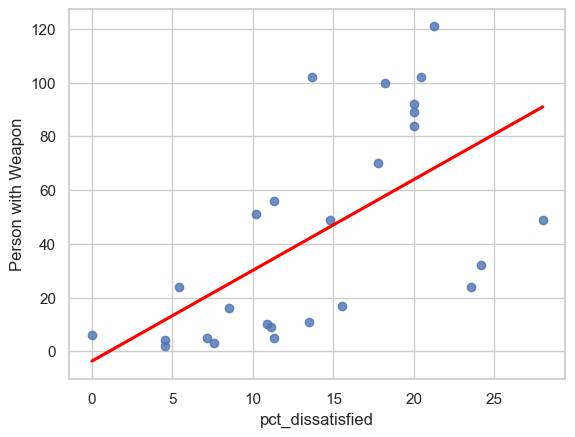

In [30]:
sns.regplot(data = large_data, x = 'pct_dissatisfied', y = 'Person with Weapon', ci=False, line_kws={'color':'red'});

---

I visualize one of the tencode descriptions that has a *small* correlation using a scatterplot and a linear trend line

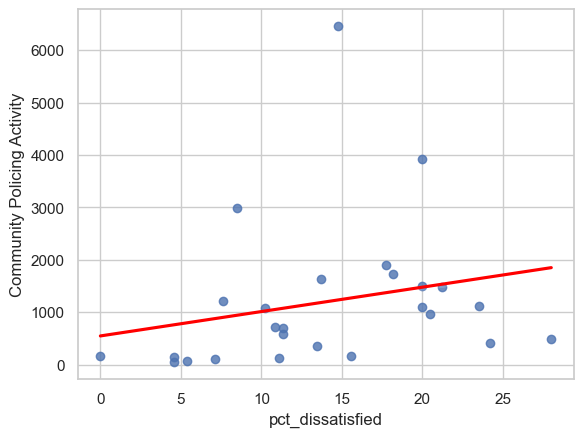

In [31]:
sns.regplot(data = large_data, x = 'pct_dissatisfied', y = 'Community Policing Activity', ci=False, line_kws={'color':'red'});

---

I follow the same process as before, but now I am interested in correlations between tencode description and *satisfaction*

I expect the tencode descriptions that have large positive correlation with dissatisfaction to also have a large negative correlation with satisfaction.

In [32]:
#Initiate an empty dictionary
corr2 = {}

#For each tencode description, the key is the tencode description and the value is the correlation with satisfaction
#Round each correlation to two decimal places
for i in large_data.loc[:,'Holdup / Robbery':'Business Check']:
    corr2[i] = round(large_data['pct_satisfied'].corr(large_data[i]),2)
    
#View the dictionary
corr2

{'Holdup / Robbery': -0.31,
 'Dangerous / Injured Animal': -0.28,
 'Person with Weapon': -0.42,
 'Suicidal Person': -0.37,
 'Intoxicated Person': -0.27,
 'Transport Prisoner / Suspect': -0.25,
 'Missing Person': -0.45,
 'Meal Break': -0.09,
 'Fixed Post': -0.29,
 'Shots Fired': -0.41,
 'Fight / Assault': -0.39,
 'Vehicle Accident - Personal Injury': -0.22,
 'Investigate 911 Hang-Up Call': -0.39,
 'Vehicle Blocking Right of Way': -0.15,
 'Burglary - Residence': -0.23,
 'Burglary - Non-Residence': -0.24,
 'Theft': -0.31,
 'Safety Hazard': -0.18,
 'Vehicle Accident - Property Damage': -0.21,
 'Disorderly Person': -0.39,
 'Suspicious Person': -0.34,
 'Community Policing Activity': -0.05,
 'Administrative/Special Assignment': -0.31,
 'Want Officer for Investigation / Assistance': -0.38,
 'Traffic Violation': -0.3,
 'Business Check': -0.22}

---

As before, I organize the correlations into a dataframe

In [33]:
#Turn the dictionary into a dataframe by resetting the index
correlations2 = pd.Series(corr2).reset_index()

#Rename the columns
correlations2.columns = ['tencode', 'correlation_with_satisfaction']

#Sort the dataframe by the magnitude of the correlations
correlations2 = correlations2.sort_values(by = 'correlation_with_satisfaction', ascending = True)

#Reset the index again
correlations2 = correlations2.reset_index(drop = True)

#View the dataframe
correlations2

,tencode,correlation_with_satisfaction
0,Missing Person,-0.45
1,Person with Weapon,-0.42
2,Shots Fired,-0.41
3,Investigate 911 Hang-Up Call,-0.39
4,Disorderly Person,-0.39
5,Fight / Assault,-0.39
6,Want Officer for Investigation / Assistance,-0.38
7,Suicidal Person,-0.37
8,Suspicious Person,-0.34
9,Administrative/Special Assignment,-0.31


---

I want to see the dataframes side by side to compare the relative posistions of the tencode descriptions

In [34]:
pd.concat([correlations, correlations2], axis = 1)

,tencode,correlation_with_dissatisfaction,tencode,correlation_with_satisfaction
0,Administrative/Special Assignment,0.63,Missing Person,-0.45
1,Missing Person,0.62,Person with Weapon,-0.42
2,Disorderly Person,0.61,Shots Fired,-0.41
3,Person with Weapon,0.61,Investigate 911 Hang-Up Call,-0.39
4,Want Officer for Investigation / Assistance,0.61,Disorderly Person,-0.39
5,Suspicious Person,0.59,Fight / Assault,-0.39
6,Investigate 911 Hang-Up Call,0.58,Want Officer for Investigation / Assistance,-0.38
7,Fight / Assault,0.58,Suicidal Person,-0.37
8,Shots Fired,0.57,Suspicious Person,-0.34
9,Traffic Violation,0.57,Administrative/Special Assignment,-0.31


The tencode descriptions are in the same general are in both dataframes.  This means that for the descriptions with corelations of large magnitude, as the frequency of tencode descriptions increases in a given zipcode, people are less satisfied *and* more dissatisfied.  

---

<a name="con"></a>

## Conclusions:

For some tencode descriptions, as the frequency of calls increases, the level of dissatisfaction with the police also increases.  These tencode descriptions include: 
- Administrative/Special Assignment
- Missing Person
- Disorderly Person
- Person with Weapon
- Want Officer for Investigation / Assistance

However, for some tencode descriptions, as the frequency of calls increases, there is little to no change in the level of dissatisfaction with the police.  These tencode descriptions include: 
- Transport Prisoner / Suspect
- Community Policing Activity
- Meal Break
- Business Check
- Intoxicated Person

---

<a name="two"></a>

# PART TWO

## Question: Are there certain days of the week where the probability of recieving a warning for a traffic violation is relatively higher?

---

<a name="cleaning2"></a>

## Data Cleaning

---

I want to take a look at the unique values in the tencode description column

In [35]:
police_calls['tencode_desc'].unique()

array(['Traffic Violation', 'Administrative/Special Assignment',
       'Safety Hazard', 'Want Officer for Investigation / Assistance',
       'Community Policing Activity', 'Vehicle Blocking Right of Way',
       'Mentally ILL Person', 'Burglary - Residence', 'Fight / Assault',
       'Vehicle Accident - Property Damage', 'Business Check',
       'Burglary - Non-Residence', 'Disorderly Person', 'Theft',
       'Shots Fired', 'Suspicious Person',
       'Vehicle Accident - Personal Injury',
       'Investigate 911 Hang-Up Call', 'Suicidal Person',
       'Personal Relief', 'Transport Prisoner / Suspect',
       'Missing Person', 'Fixed Post', 'Intoxicated Person', 'Meal Break',
       'Dangerous / Injured Animal', 'Corpse / D. O. A.',
       'Person with Weapon', 'Hazardous Liquid / Gas Leak',
       'Occult Activity', 'Prowler', 'Gang Activity', 'Holdup / Robbery',
       'Kidnapping', 'Person Screaming', 'Person Indecently Exposed',
       'Shooting', 'Bank Robbery', 'Fire', 'Cutting

---

I create a df containing only traffic violations

In [36]:
traffic_violations = police_calls.loc[police_calls['tencode_desc'] == 'Traffic Violation']

traffic_violations

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
6,02/16/2018 08:13:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F36,H,21,36.174,-86.602,37076,HERMITAGE
12,02/16/2018 04:52:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.176,-86.595,37076,HERMITAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717700,08/30/2018 06:49:51 PM,B,93,Traffic Violation,9,SUBJECT WARNED,6D52,MT,35,36.003,-86.697,37027,BRENTWOOD
717746,09/11/2018 05:57:16 PM,B,93,Traffic Violation,9,SUBJECT WARNED,333B,S,31,35.997,-86.690,37027,BRENTWOOD
717857,07/14/2018 08:55:14 PM,B,93,Traffic Violation,9,SUBJECT WARNED,LAKE5,H,23,36.129,-86.564,37122,MOUNT JULIET
717969,09/09/2018 07:54:39 PM,B,93,Traffic Violation,9,SUBJECT WARNED,125B,W,23,36.120,-86.991,37143,PEGRAM


---

I want to see all of the possible outcomes of a traffic violation

In [37]:
traffic_violations['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ARREST, CUSTODIAL OR CITATION', 'NO RESPONSE',
       'M.P.D. REPORT COMPLED', 'FALSE CALL', 'LOCATION/BUILDING SECURE',
       'COMMUNITY POLICING', 'ASSISTED CITIZEN', 'ADVISED IN CIVIL CASE',
       'ASSISTANCE REFUSED'], dtype=object)

---

Because I am interested in citations and warnings, I keep only incidents that ended in either a citation or a warning

In [38]:
traffic_violations = traffic_violations[traffic_violations['disposition_desc'].isin(['CITATION - TRAFFIC', 'SUBJECT WARNED'])]

traffic_violations.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE
6,02/16/2018 08:13:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F36,H,21,36.174,-86.602,37076,HERMITAGE
12,02/16/2018 04:52:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.176,-86.595,37076,HERMITAGE


---

I want to create new columns for 'month' and 'day name' so I first check the date type for the call_time column

In [39]:
traffic_violations.dtypes

call_time            object
shift                object
tencode               int64
tencode_desc         object
disposition           int64
disposition_desc     object
unit_dispatched      object
sector               object
zone                 object
lat                 float64
lng                 float64
zipcode               int64
po                   object
dtype: object

---

'call_time' is currently an object and so I need to convert it to a pandas datetime

In [40]:
#I make sure to specify the datetime format
traffic_violations['call_time'] = pd.to_datetime(police_calls['call_time'], format = '%m/%d/%Y %I:%M:%S %p')

C:\Users\isaac\AppData\Local\Temp\ipykernel_7296\858060602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violations['call_time'] = pd.to_datetime(police_calls['call_time'], format = '%m/%d/%Y %I:%M:%S %p')


---

I check the type again to make sure it changed to datetime

In [41]:
traffic_violations.dtypes

call_time           datetime64[ns]
shift                       object
tencode                      int64
tencode_desc                object
disposition                  int64
disposition_desc            object
unit_dispatched             object
sector                      object
zone                        object
lat                        float64
lng                        float64
zipcode                      int64
po                          object
dtype: object

---

I create a new column for the month

In [42]:
traffic_violations['month'] = traffic_violations['call_time'].dt.month

traffic_violations.head()

C:\Users\isaac\AppData\Local\Temp\ipykernel_7296\2635358837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violations['month'] = traffic_violations['call_time'].dt.month


,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2
6,2018-02-16 20:13:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F36,H,21,36.174,-86.602,37076,HERMITAGE,2
12,2018-02-16 16:52:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.176,-86.595,37076,HERMITAGE,2


---

I create a new column for the day name

In [43]:
traffic_violations['day_name'] = traffic_violations['call_time'].dt.day_name()

traffic_violations.head()

C:\Users\isaac\AppData\Local\Temp\ipykernel_7296\3901693090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_violations['day_name'] = traffic_violations['call_time'].dt.day_name()


,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month,day_name
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2,Friday
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2,Friday
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2,Friday
6,2018-02-16 20:13:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F36,H,21,36.174,-86.602,37076,HERMITAGE,2,Friday
12,2018-02-16 16:52:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.176,-86.595,37076,HERMITAGE,2,Friday


---

<a name="explore2"></a>

# Data Exploration

---

I obtain a count of traffic violation stops by day of the week

In [44]:
#I count the total violations by day and reset the index to turn it into a dataframe
traffic_violation_by_day = traffic_violations['day_name'].value_counts().reset_index()

#rename the columns
traffic_violation_by_day.columns = ['day_name', 'violation_count']

#view the dataframe
traffic_violation_by_day

,day_name,violation_count
0,Wednesday,22338
1,Tuesday,22068
2,Thursday,21669
3,Friday,20919
4,Monday,19945
5,Saturday,12882
6,Sunday,10826


---

I look at the count of warnings by day of the week

In [45]:
#filter the df to include only warnings
warnings_df = traffic_violations.loc[traffic_violations['disposition_desc'] == 'SUBJECT WARNED']

#obtain a count of warnings by day and reset the index to turn it into a dateframe
warnings_by_day = warnings_df['day_name'].value_counts().reset_index()

#rename the columns
warnings_by_day.columns = ['day_name', 'warning_count']

#view the count of warnings by day
warnings_by_day

,day_name,warning_count
0,Wednesday,18598
1,Tuesday,18175
2,Thursday,17896
3,Friday,17549
4,Monday,16514
5,Saturday,11187
6,Sunday,9568


---

I want to know what percent of traffic stops end in a warning.  I will merge the previous two data frames, then divide the count of warnings by the total violations

In [46]:
violation_warning_count_df = pd.merge(traffic_violation_by_day, warnings_by_day, how = 'inner', on = 'day_name')

violation_warning_count_df

,day_name,violation_count,warning_count
0,Wednesday,22338,18598
1,Tuesday,22068,18175
2,Thursday,21669,17896
3,Friday,20919,17549
4,Monday,19945,16514
5,Saturday,12882,11187
6,Sunday,10826,9568


---

I divide warning count by violation count, then multiply by 100 to get a percentage of violations that end in a warning

In [47]:
#round percent to two decimal places
violation_warning_count_df['pct_warning'] = round(violation_warning_count_df['warning_count']/violation_warning_count_df['violation_count'] * 100,2 )

violation_warning_count_df

,day_name,violation_count,warning_count,pct_warning
0,Wednesday,22338,18598,83.26
1,Tuesday,22068,18175,82.36
2,Thursday,21669,17896,82.59
3,Friday,20919,17549,83.89
4,Monday,19945,16514,82.80
5,Saturday,12882,11187,86.84
6,Sunday,10826,9568,88.38


---

I want the days to be sorted Monday-Sunday

In [48]:
#define a list monday-sunday in order
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#I change the type of 'day_name' to an ordered categorical using the previously defined list
violation_warning_count_df['day_name'] = pd.Categorical(violation_warning_count_df['day_name'], 
                                                        categories = cats, 
                                                        ordered = True)

#sort the df by the 'day_name' column
violation_warning_count_df = violation_warning_count_df.sort_values(by = 'day_name')

#view the df
violation_warning_count_df

,day_name,violation_count,warning_count,pct_warning
4,Monday,19945,16514,82.80
1,Tuesday,22068,18175,82.36
0,Wednesday,22338,18598,83.26
2,Thursday,21669,17896,82.59
3,Friday,20919,17549,83.89
5,Saturday,12882,11187,86.84
6,Sunday,10826,9568,88.38


---

I create a bar chart visualizing the percent of traffic stops that end in a warning

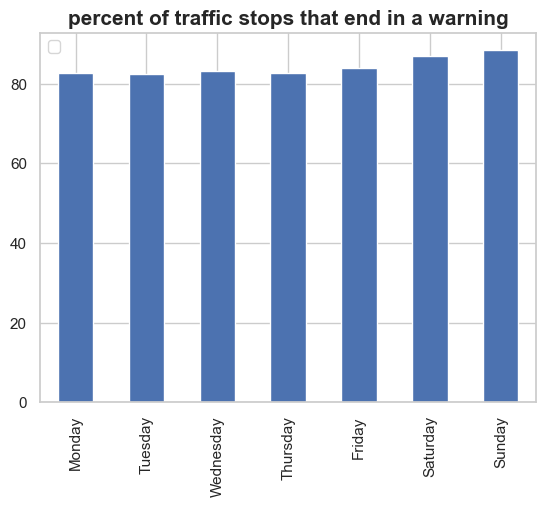

In [49]:
#create a bar chart
violation_warning_count_df.plot(kind = 'bar', x = 'day_name', y = 'pct_warning')

#remove the x and y labels
plt.xlabel('')
plt.legend('')

#add a title
plt.title('percent of traffic stops that end in a warning', size = 15, fontweight = 'bold');

It looks like there is a slightly higher chance of recieveing a warning as opposed to a citation on the weekends

---

<a name="analysis2"></a>

## Analysis

---

I slice the dataframe to create two data frames (one for the weekend and one for the weekday)

In [50]:
#slice the first five values for the weekday df
weekday_df = violation_warning_count_df[0:5]

#slice from index 5 all the way to the end for the weekend df
weekend_df = violation_warning_count_df[5:]

In [51]:
#view the weekday df
weekday_df

,day_name,violation_count,warning_count,pct_warning
4,Monday,19945,16514,82.80
1,Tuesday,22068,18175,82.36
0,Wednesday,22338,18598,83.26
2,Thursday,21669,17896,82.59
3,Friday,20919,17549,83.89


In [52]:
#view the weekend df
weekend_df

,day_name,violation_count,warning_count,pct_warning
5,Saturday,12882,11187,86.84
6,Sunday,10826,9568,88.38


---

On average, what percent chance does a person have of getting a warning on a weekday?

In [53]:
print('On average, there is a',\
      round(weekday_df['pct_warning'].mean(), 2),\
      'percent chance of receiving a warning on a weekday, with a standard deviation of', \
      round(weekday_df['pct_warning'].std(), 2))

On average, there is a 82.98 percent chance of receiving a warning on a weekday, with a standard deviation of 0.61


---

On average, what percent chance does a person have of getting a warning on a weekend?

In [54]:
print('On average, there is a', \
      round(weekend_df['pct_warning'].mean(), 2),\
      'percent chance of receiving a warning on a weekend with a standard deviation of', \
      round(weekend_df['pct_warning'].std(), 2))

On average, there is a 87.61 percent chance of receiving a warning on a weekend with a standard deviation of 1.09


---

<a name="con2"></a>

## Conclusions:

When looking at traffic violations that end in either a warning or a citation, there is a higher chance of receiving a warning on a weekend compared to the week day.  

On average, there is an 82.98% chance of receiving a warning on a weekday and an 87.61% chance of receiving a warning on a weekend